In [1]:
from pennylane import qaoa
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

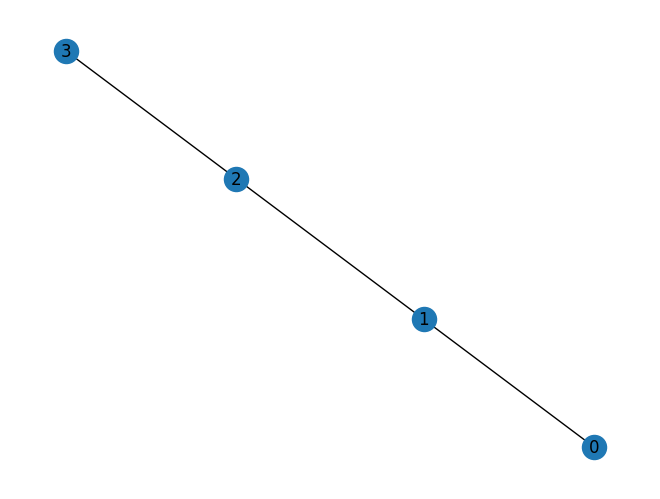

In [2]:
edges = [(0, 1), (1, 2), (2, 3)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [3]:
cost_h,mixer_h = qaoa.cost.max_independent_set(graph,1)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (1) [Z0]
+ (1) [Z1]
+ (1) [Z2]
+ (1) [Z3]
Mixer Hamiltonian   (0.25) [X1]
+ (0.25) [X2]
+ (0.5) [X0]
+ (0.5) [X3]
+ (0.25) [X1 Z2]
+ (0.25) [X1 Z0]
+ (0.25) [X2 Z3]
+ (0.25) [X2 Z1]
+ (0.5) [X0 Z1]
+ (0.5) [X3 Z2]
+ (0.25) [X1 Z0 Z2]
+ (0.25) [X2 Z1 Z3]


In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [5]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [6]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [8]:
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5,0.5], [0.5,0.5]], requires_grad=True)

In [9]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[0.5        0.00159991]
 [0.57988711 0.62573848]]


In [10]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

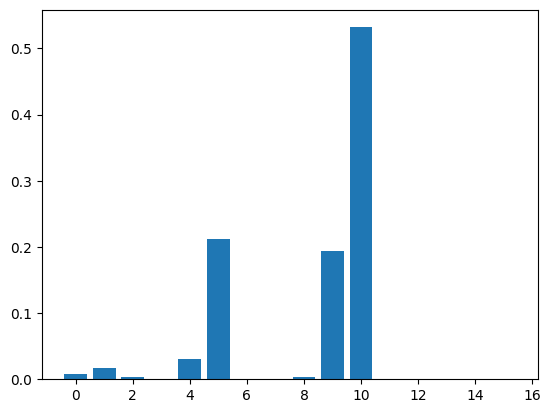

In [11]:

plt.bar(range(2 ** len(wires)), probs)
plt.show()


### square-diagonal

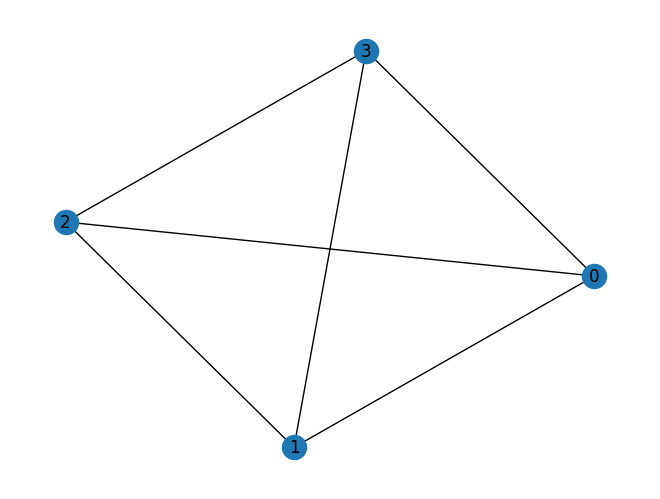

In [13]:
edges = [(0, 1), (1, 2), (2, 3),(3,0),(1,3),(2,0)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [16]:
cost_h,mixer_h = qaoa.cost.max_independent_set(graph,1)
print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (1) [Z0]
+ (1) [Z1]
+ (1) [Z2]
+ (1) [Z3]
Mixer Hamiltonian   (0.125) [X0]
+ (0.125) [X1]
+ (0.125) [X2]
+ (0.125) [X3]
+ (0.125) [X0 Z2]
+ (0.125) [X0 Z3]
+ (0.125) [X0 Z1]
+ (0.125) [X1 Z3]
+ (0.125) [X1 Z2]
+ (0.125) [X1 Z0]
+ (0.125) [X2 Z0]
+ (0.125) [X2 Z3]
+ (0.125) [X2 Z1]
+ (0.125) [X3 Z1]
+ (0.125) [X3 Z0]
+ (0.125) [X3 Z2]
+ (0.125) [X0 Z3 Z2]
+ (0.125) [X0 Z1 Z2]
+ (0.125) [X0 Z1 Z3]
+ (0.125) [X1 Z2 Z3]
+ (0.125) [X1 Z0 Z3]
+ (0.125) [X1 Z0 Z2]
+ (0.125) [X2 Z3 Z0]
+ (0.125) [X2 Z1 Z0]
+ (0.125) [X2 Z1 Z3]
+ (0.125) [X3 Z0 Z1]
+ (0.125) [X3 Z2 Z1]
+ (0.125) [X3 Z2 Z0]
+ (0.125) [X0 Z1 Z3 Z2]
+ (0.125) [X1 Z0 Z2 Z3]
+ (0.125) [X2 Z1 Z3 Z0]
+ (0.125) [X3 Z2 Z0 Z1]


In [17]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [18]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [19]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [20]:
optimizer = qml.GradientDescentOptimizer()
steps = 700
params = np.array([[0.5, 0.5], [0.5,0.5]], requires_grad=True)

In [21]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[5.00000000e-01 3.80690043e-13]
 [4.13055904e-01 4.13055904e-01]]


In [22]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

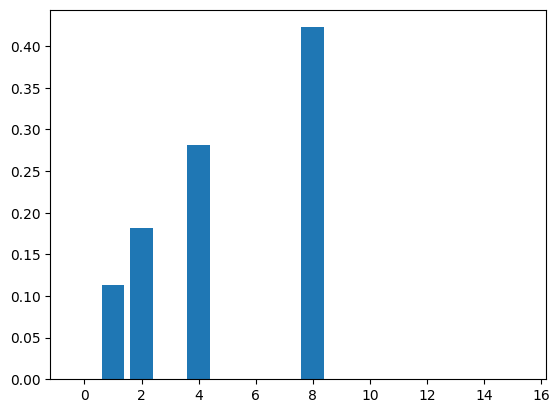

In [23]:

plt.bar(range(2 ** len(wires)), probs)
plt.show()


### Square-one-diagonal

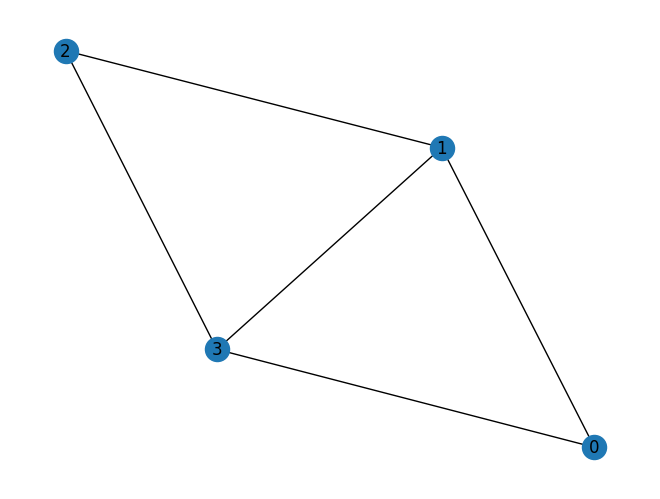

In [24]:
edges = [(0, 1), (1, 2), (2, 3),(3,0),(1,3)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [25]:
cost_h,mixer_h = qaoa.cost.max_independent_set(graph,1)
print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (1) [Z0]
+ (1) [Z1]
+ (1) [Z2]
+ (1) [Z3]
Mixer Hamiltonian   (0.125) [X1]
+ (0.125) [X3]
+ (0.25) [X0]
+ (0.25) [X2]
+ (0.125) [X1 Z3]
+ (0.125) [X1 Z2]
+ (0.125) [X1 Z0]
+ (0.125) [X3 Z1]
+ (0.125) [X3 Z0]
+ (0.125) [X3 Z2]
+ (0.25) [X0 Z3]
+ (0.25) [X0 Z1]
+ (0.25) [X2 Z3]
+ (0.25) [X2 Z1]
+ (0.125) [X1 Z2 Z3]
+ (0.125) [X1 Z0 Z3]
+ (0.125) [X1 Z0 Z2]
+ (0.125) [X3 Z0 Z1]
+ (0.125) [X3 Z2 Z1]
+ (0.125) [X3 Z2 Z0]
+ (0.25) [X0 Z1 Z3]
+ (0.25) [X2 Z1 Z3]
+ (0.125) [X1 Z0 Z2 Z3]
+ (0.125) [X3 Z2 Z0 Z1]


In [26]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [27]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [28]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [29]:
optimizer = qml.GradientDescentOptimizer()
steps = 700
params = np.array([[0.5, 0.5], [0.5,0.5]], requires_grad=True)

In [30]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[5.00000000e-01 3.32984703e-03]
 [1.57079633e+00 9.61508510e-12]]


In [31]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

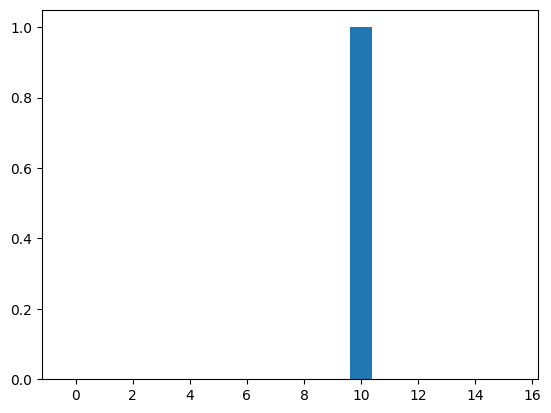

In [32]:

plt.bar(range(2 ** len(wires)), probs)
plt.show()
